## Importing dataset and preprocessing the data

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
# Reshape
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



11493376/11490434 [==============================] - 0s 0us/step


## Visualising input image

(28, 28, 1)


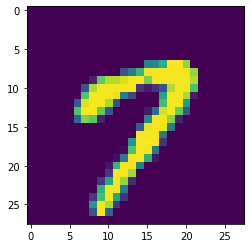

In [3]:
from matplotlib import pyplot as plt
import numpy as np

first_image = x_train[15]
first_image = np.asarray(first_image)
print(first_image.shape)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)
plt.show()

In [4]:
# image_array size - w*h , d
img = first_image
print(first_image.shape)
w, h, d = first_image.shape
image_array = img.reshape(w*h,d) #Flatten
print('ReShaped'.center(20,'='))
print(image_array.shape)

(28, 28, 1)
======ReShaped======
(784, 1)


## Analysing the relationship between the number of clusters and the inertia to find the optimum number of clusters

In [6]:
# for clustering image pixels
from sklearn.cluster import KMeans 

x_cluster = []
y_inertia = []

def calculate_metrics(model):
 x_cluster.append(model.n_clusters)
 y_inertia.append(model.inertia_)

from sklearn import metrics
cluster_number = [2,3,4,5]
kmeans_number = []
for i in cluster_number:
  #total_clusters = len(np.unique(image_array))
  # Initialize the K-Means model
  kmeans = KMeans(n_clusters = i,random_state=42,verbose=2,n_jobs=-1).fit(image_array)
  kmeans_number.append(kmeans)
  # Calculating the metrics
  calculate_metrics(kmeans)

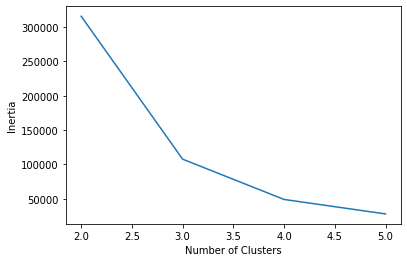

In [7]:
# plotting the points 
plt.plot(x_cluster, y_inertia) 
# naming the x axis
plt.xlabel('Number of Clusters')
# naming the y axis
plt.ylabel('Inertia')
plt.show()

## Clustering the pixel points

In [8]:
kmeans64 = KMeans(n_clusters = 5,random_state=42,verbose=2,n_jobs=-1).fit(image_array)

## Constructing the Compressed image

In [9]:
def recreate_image(kmeans):
  compressed_image_array = kmeans.cluster_centers_[kmeans.labels_] #[0,3,2,1,.........]
  #Reshape the image to original dimension
  compressed_image = compressed_image_array.reshape(w,h)
  #Save and display output image
  return compressed_image

## Compare the original and the reconstructed image

In [10]:
def nLabels(kmeans):  
  return kmeans.n_clusters

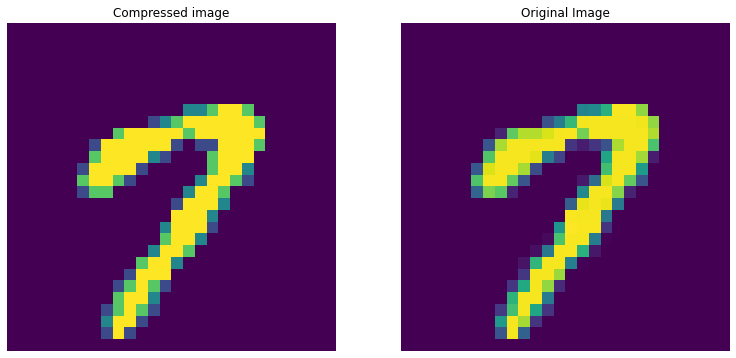

In [11]:
def plot_img(kmeans):
  str_n = "No. of clusters: "+str(nLabels(kmeans))
  plt.figure(figsize=(20,10))
  plt.title(str_n)
  plt.subplot(132)
  plt.axis('off')
  plt.title('Original Image')
  plt.imshow(pixels)
  plt.subplot(131)
  plt.axis('off')
  plt.title('Compressed image')
  op_img = recreate_image(kmeans)
  plt.imshow(op_img)

plot_img(kmeans64)



## Visualising the compressed image for all the clusters

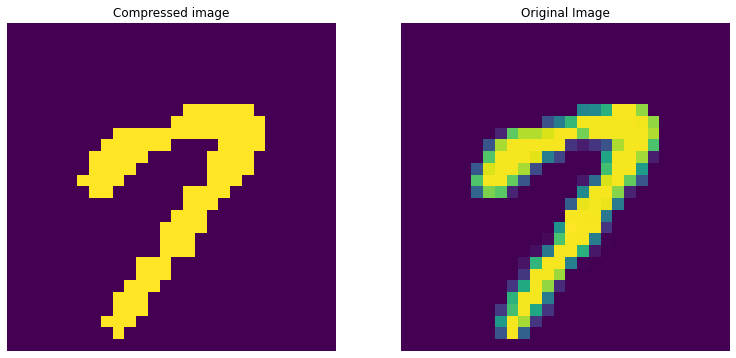

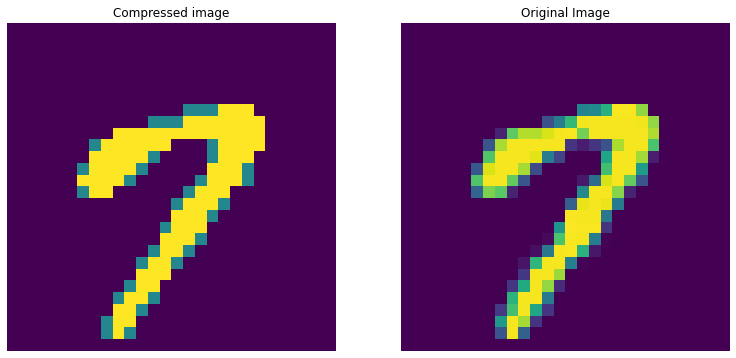

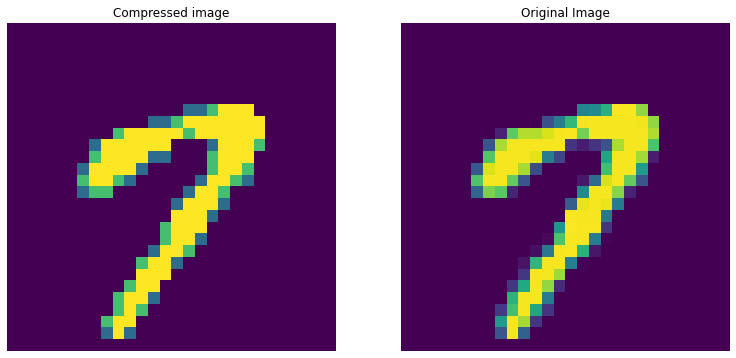

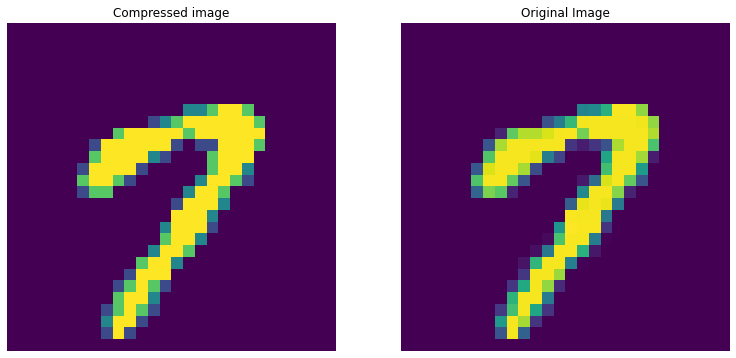

In [13]:
from sklearn import metrics
for i in range(len(cluster_number)):
  #total_clusters = len(np.unique(image_array))
  # Initialize the K-Means model
  plot_img(kmeans_number[i])

## Analysing PSNR value for different cluster values

In [17]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = pixels

y_psnr = []

for i in range(len(cluster_number)):
  compressed = recreate_image(kmeans_number[i])
  y_psnr.append(PSNR(original, compressed))


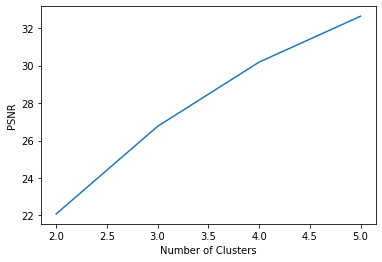

In [18]:
# plotting the points 
plt.plot(x_cluster, y_psnr) 
# naming the x axis
plt.xlabel('Number of Clusters')
# naming the y axis
plt.ylabel('PSNR')
plt.show()